<a href="https://colab.research.google.com/github/DurjoyRakibul/Astronomy/blob/Durjoy/starsofandromeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This code will show diffrent stars of andromeda.**

In [11]:
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
from matplotlib.colors import LogNorm
from astropy.io import fits
from photutils.detection import DAOStarFinder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture

In [12]:
fits_file = fits.open('f001a066.fits')
print(fits_file)
image_data = fits_file[0].data
print(image_data)

[[ 8583  8383  8483 ... 27744 28144 28044]
 [ 8983  8583  8983 ... 28544 28544 28544]
 [ 8783  8783  8983 ... 28344 29944 29544]
 ...
 [ 9658  9658  9858 ... 28276 28276 28076]
 [ 9958  9958 10358 ... 27876 28276 29576]
 [ 9758  9758 10158 ... 29476 30276 29976]]


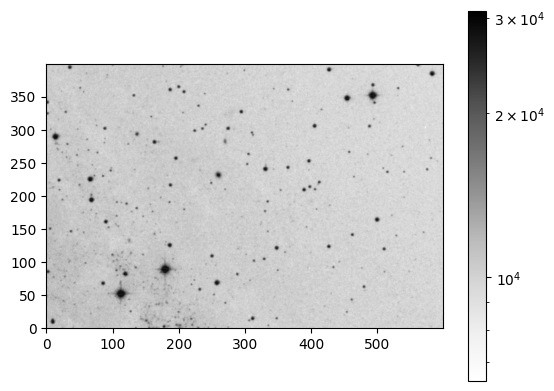

In [13]:
centerofGalaxy = image_data[2250:2650, 5350:5950]
plt.figure()
plt.imshow(centerofGalaxy, origin = 'lower', cmap='Greys', norm=LogNorm())
plt.colorbar()
plt.show()

In [14]:
mean, median, std = sigma_clipped_stats(centerofGalaxy,sigma=3.0)
print((mean,median,std))


(10234.8415486871, 10181.0, 608.41475444704)


In [15]:
# find stars that have a full-width-half-maximum of about 3 pixels and
# are at least 5 sigma above the background level
daofind = DAOStarFinder(fwhm = 30, threshold = 50*std)

# define table named "sources"
sources = daofind(centerofGalaxy-median)

# format sources table
for col in sources.colnames:
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'
# print table (make sure to use 'p-print' not just 'print')
sources.pprint(max_width = 76)


 id xcentroid ycentroid sharpness ...   peak      flux     mag   daofind_mag
--- --------- --------- --------- ... -------- ---------- ------ -----------
  1    112.94     51.54      0.77 ... 17867.00 4753984.00 -16.69       -1.50
  2    179.82     88.04      0.78 ... 18345.00 4722686.00 -16.69       -1.52
  3    493.52    350.68      0.97 ... 16547.00 2075152.00 -15.79       -1.29


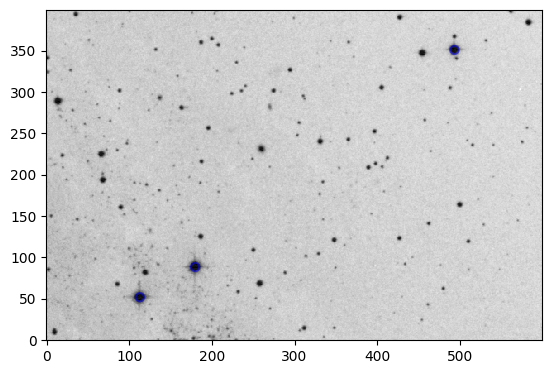

In [17]:
'''visualize detected stars with matplotlib'''
# define star positions based on sources table, then draw
# apertures around each position (radius 5) and plot data
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r = 5.0)
plt.imshow(centerofGalaxy, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')

# draw apertures. apertures.plot command takes arguments (color, line-width, and opacity (alpha))
apertures.plot(color = 'blue', lw = 1.5, alpha = 0.5);

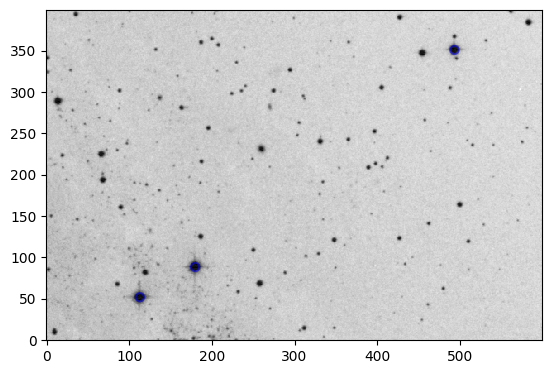

In [19]:
'''Mask regions with bright stars'''

mask = np.zeros(centerofGalaxy.shape, dtype=bool)

# select regions to mask (y:y,x:x)
mask[260:320,40:80] = True
mask[230:350,170:240] = True
mask[260:340,240:320] = True
mask[250:330,420:470] = True

# redefine sources table
sources = daofind(centerofGalaxy-median,mask=mask)
xpix = sources['xcentroid']
ypix = sources['ycentroid']

# plot new table
positions = np.transpose((xpix,ypix))
apertures = CircularAperture(positions,r=5.0)
plt.imshow(centerofGalaxy, cmap='Greys', norm=LogNorm(), origin = 'lower', interpolation='nearest')
apertures.plot(color='blue',lw=1.5, alpha = 0.5);

In [20]:
'''use find_peaks to detect stars'''

from astropy.stats import sigma_clipped_stats
from photutils.detection import find_peaks

# define mean, median, and std
mean, median, std = sigma_clipped_stats(centerofGalaxy, sigma = 3.0)

# find stars that are at least 5 sigma above background and
# separated by at least 5 pixels
threshold = median + (5.0*std)

# define, format, and print table of peak values
tbl = find_peaks(centerofGalaxy, threshold, box_size = 11)
tbl['peak_value'].info.format = '%8g'
print(tbl)

 id x_peak y_peak peak_value
--- ------ ------ ----------
  1     25      0      13492
  2    135      0      17023
  3    155      0      17795
  4    162      0      15520
  5    229      0      18368
  6    245      0      14781
  7    256      0      14143
  8     40      1      13317
  9    275      1      14796
 10    178      2      24270
...    ...    ...        ...
269    583    383      29741
270     61    384      13333
271    299    389      16092
272    428    389      28523
273     36    393      26952
274    176    395      16608
275    100    397      15902
276    101    397      15902
277    562    397      26203
278    206    399      27807
Length = 278 rows


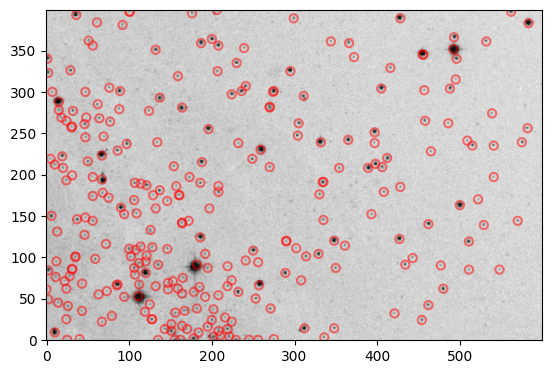

In [21]:
'''visualize locations of detected peaks with matplotlib'''

# define positions based on peak table and plot data
peak_positions = np.transpose((tbl['x_peak'], tbl['y_peak']))
plt.imshow(centerofGalaxy, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')

# plot peak apertures
peak_apertures = CircularAperture(peak_positions, r = 5.0)
peak_apertures.plot(color = 'red', lw = 1.5, alpha = 0.5);